In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



READING THE DATASET

In [144]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Crop Production data.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


UNDERSTANDING THE DATA

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [146]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [147]:
df.describe(include=object)

,State_Name,District_Name,Season,Crop
count,246091,246091,246091,246091
unique,33,646,6,124
top,Uttar Pradesh,BIJAPUR,Kharif,Rice
freq,33306,945,95951,15104


In [114]:
df.shape

(246091, 7)

CHECKING FOR NULL VALUES

In [115]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

DEALING WITH NULL VALUES

In [116]:
df[df['Production'].isna()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [117]:
df['Production'].fillna(0, inplace=True)
df['Production'].isna().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_6272\2512127675.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Production'].fillna(0, inplace=True)


0

CHECKING FOR DUPLICATES

In [118]:

df.duplicated().sum()

0

DROPPING INAPPROPRIATE ENTRIES AND NON USEFUL FEATURES

In [119]:

df['Season'].value_counts()

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64

In [120]:
df.drop(df[df['Season'] == 'Total'].index, inplace=True)

<Axes: >

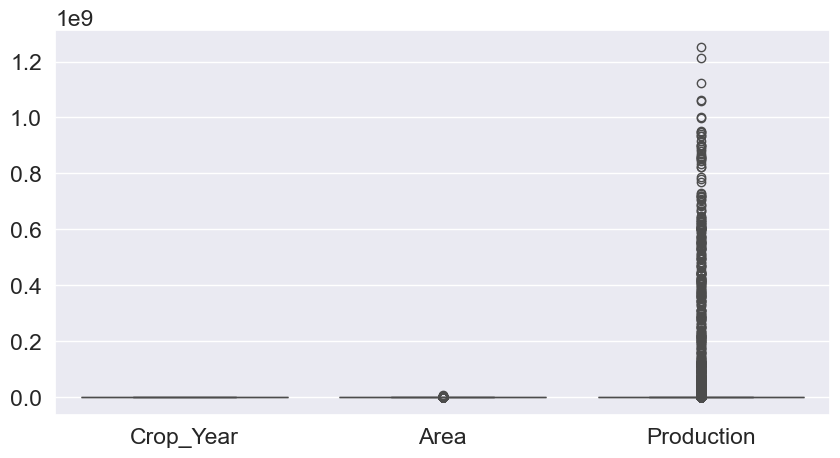

In [121]:

plt.figure(figsize=(10, 5))
sns.boxplot(df)

EXPLORATORY DATA ANALYSIS(EDA)

In [122]:
np.mean(df['Area'])

12002.82086370489

In [123]:
df.rename(columns={'State_Name': 'State and UT'}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6272\1490598294.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=DF['State and UT'].head(5),


,State and UT,Area
30,Uttar Pradesh,4.336316e+08
16,Madhya Pradesh,3.298131e+08
17,Maharashtra,3.222062e+08
25,Rajasthan,2.720249e+08
32,West Bengal,2.154052e+08


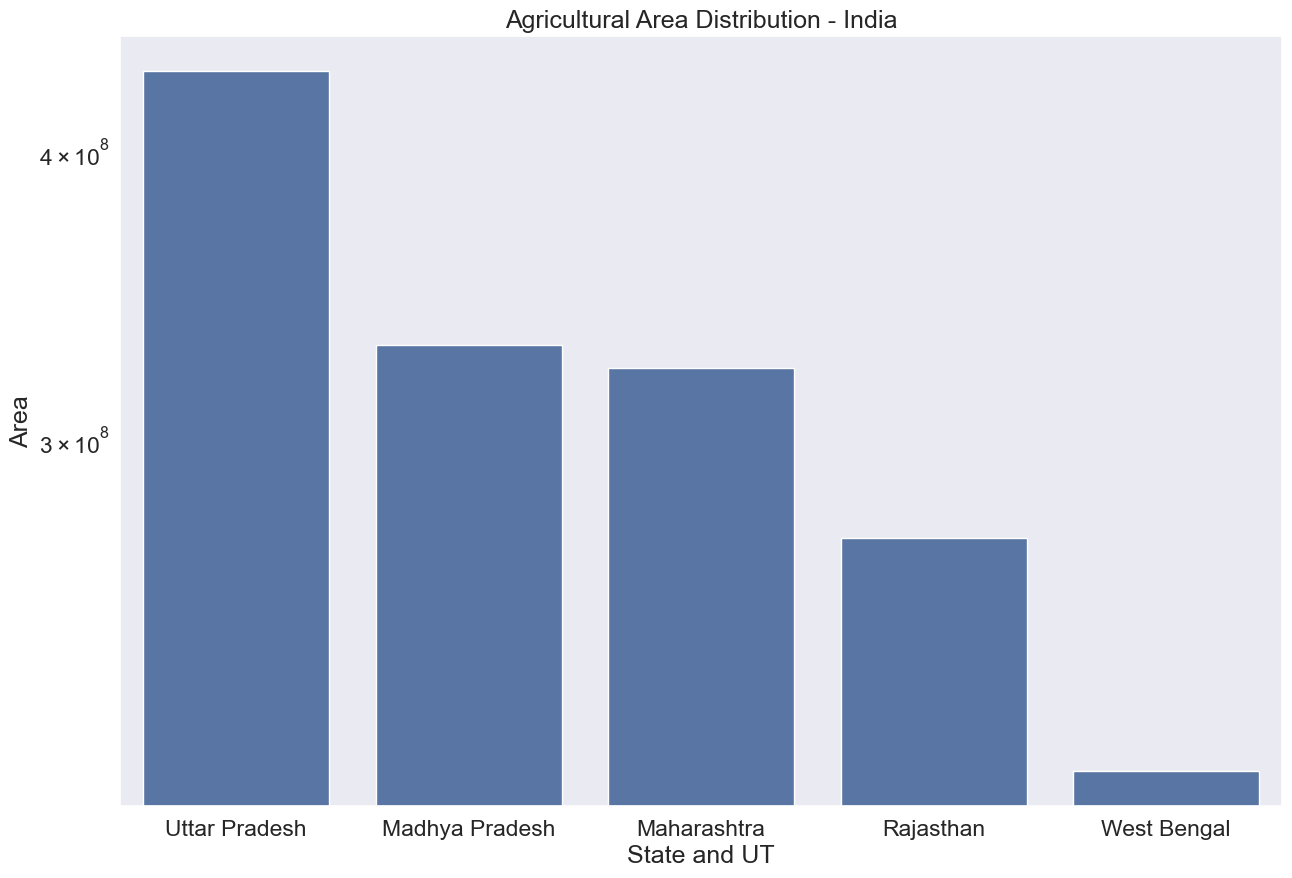

In [124]:
DF = df.copy()
DF = DF.groupby(
    by='State and UT')['Area'].sum().reset_index().sort_values(
        by='Area', ascending=False)
DF.head()

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=DF['State and UT'].head(5),
            y=DF['Area'].head(5),
            errwidth=0)
sns.set(font_scale=1.5)
plt.yscale('log')
plt.title('Agricultural Area Distribution - India')
DF.head(5)

STATE NAME

In [125]:
DF['State and UT'].nunique()

33

In [126]:
df['State and UT'].value_counts()

State and UT
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                  

STATE AND UNION TERRITORY VS PRODUCTION IN TONES

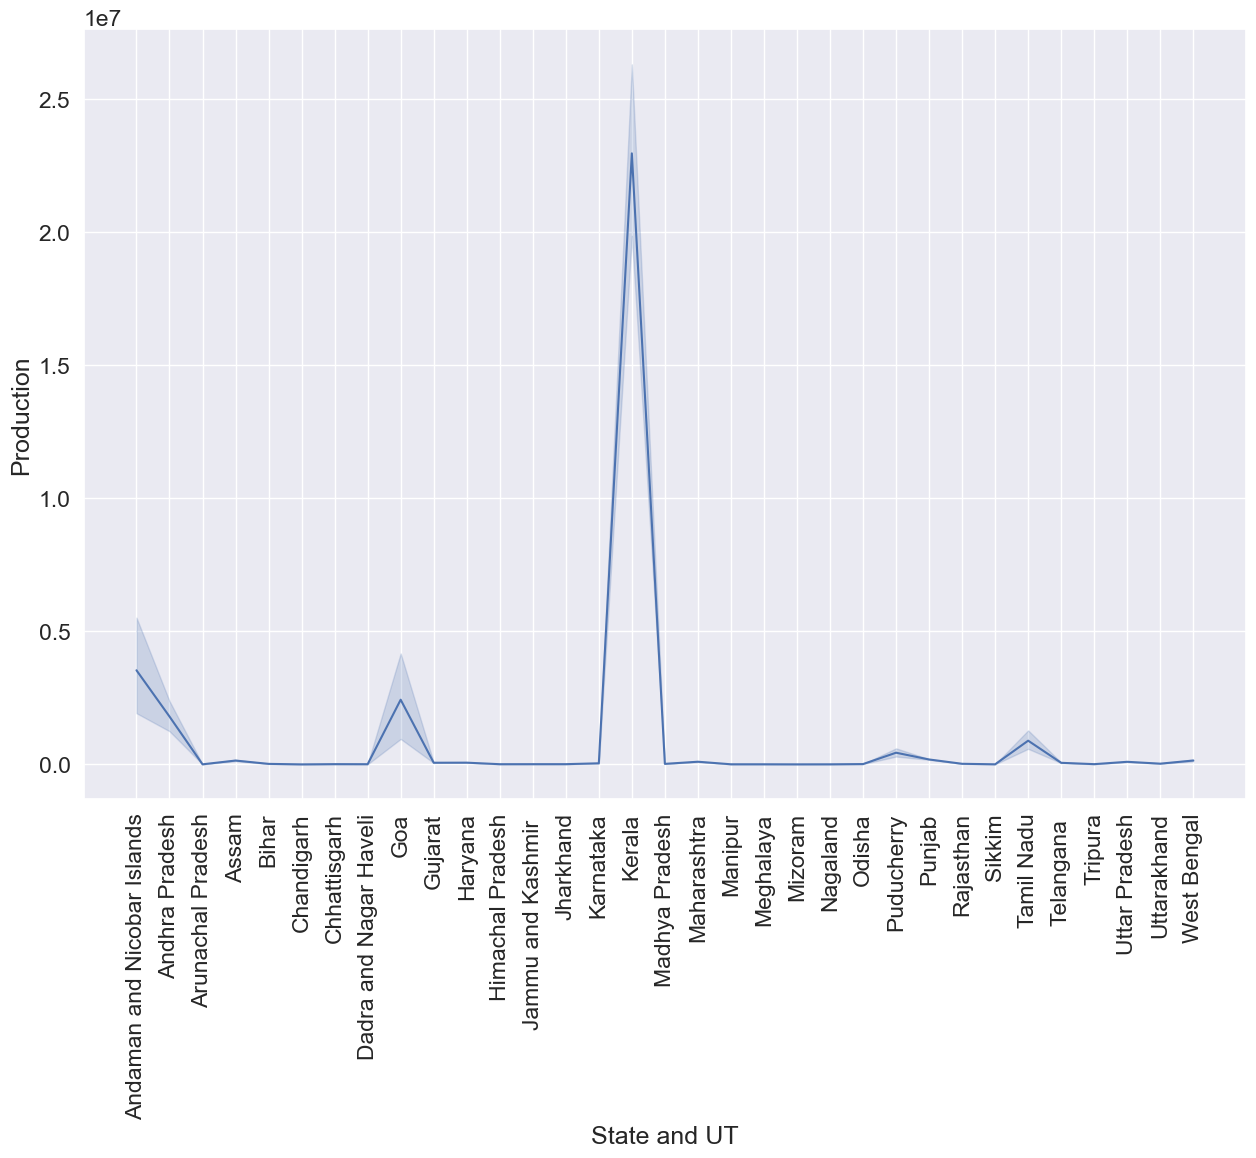

In [127]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=df['State and UT'],y=df['Production'])
plt.xticks(rotation=90)
plt.show()

DISTRICT

In [128]:


df['District_Name'].nunique()

646

TOP 10 DISTRICTS WITH HIGHEST PRODUCTION IN LAST 22 YEARS

In [129]:
df.groupby(['State and UT',
            'District_Name']).sum().nlargest(10, 'Production')

Crop_Year  \
State and UT   District_Name                   
Kerala         KOZHIKODE              557628   
               MALAPPURAM             613760   
               THIRUVANANTHAPURAM     559601   
               THRISSUR               563622   
               KANNUR                 601769   
Andhra Pradesh EAST GODAVARI         1534585   
Kerala         KASARAGOD              653948   
               KOLLAM                 593753   
               PALAKKAD               786382   
               ERNAKULAM              573666   

                                                                              Season  \
State and UT   District_Name                                                           
Kerala         KOZHIKODE           Whole Year Whole Year Whole Year Whole Year Wh...   
               MALAPPURAM          Whole Year Whole Year Whole Year Whole Year Wh...   
               THIRUVANANTHAPURAM  Whole Year Whole Year Whole Year Whole Year Wh...   
               THRISSUR            Whole Year Whole Year Whole Year Whole Year Wh...   
               KANNUR              Whole Year Whole Year Whole Year Whole Year Wh...   
Andhra Pradesh EAST GODAVARI       Kharif     Kharif     Kharif     Kharif     Kh...   
Kerala         KASARAGOD           Whole Year Whole Year Whole Year Whole Year Wh...   
               KOLLAM              Whole Year Whole Year Whole Year Whole Year Wh...   
               PALAKKAD            Whole Year Whole Year Whole Year Whole Year Wh...   
               ERNAKULAM           Whole Year Whole Year Whole Year Whole Year Wh...   

                                                                                Crop  \
State and UT   District_Name                                                           
Kerala         KOZHIKODE           ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               MALAPPURAM          ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               THIRUVANANTHAPURAM  ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               THRISSUR            ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               KANNUR              ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
Andhra Pradesh EAST GODAVARI       Arhar/TurBajraCotton(lint)Dry chilliesGroundnu...   
Kerala         KASARAGOD           ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               KOLLAM              ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               PALAKKAD            ArecanutBlack pepperCashewnutCoconut TapiocaRi...   
               ERNAKULAM           ArecanutBlack pepperCashewnutCoconut TapiocaRi...   

                                          Area    Production  
State and UT   District_Name                                  
Kerala         KOZHIKODE            2999653.25  1.528074e+10  
               MALAPPURAM           3210396.71  1.451840e+10  
               THIRUVANANTHAPURAM   2218004.26  1.002271e+10  
               THRISSUR             2447885.02  9.923508e+09  
               KANNUR               3011744.84  9.783432e+09  
Andhra Pradesh EAST GODAVARI       11598837.00  8.271057e+09  
Kerala         KASARAGOD            1872024.10  7.732217e+09  
               KOLLAM               2167962.15  7.151945e+09  
               PALAKKAD             3686323.76  6.369382e+09  
               ERNAKULAM            1928819.81  5.021649e+09

CROP

<Axes: xlabel='District_Name'>

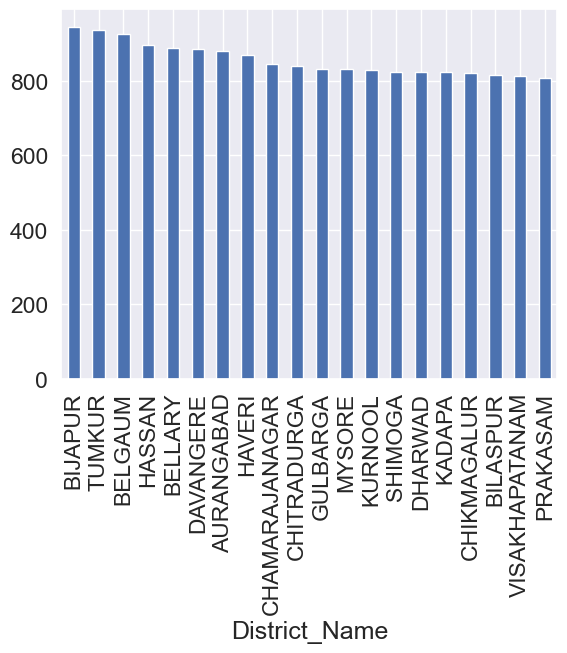

In [130]:
df.District_Name.value_counts()[:20].plot(kind="bar")

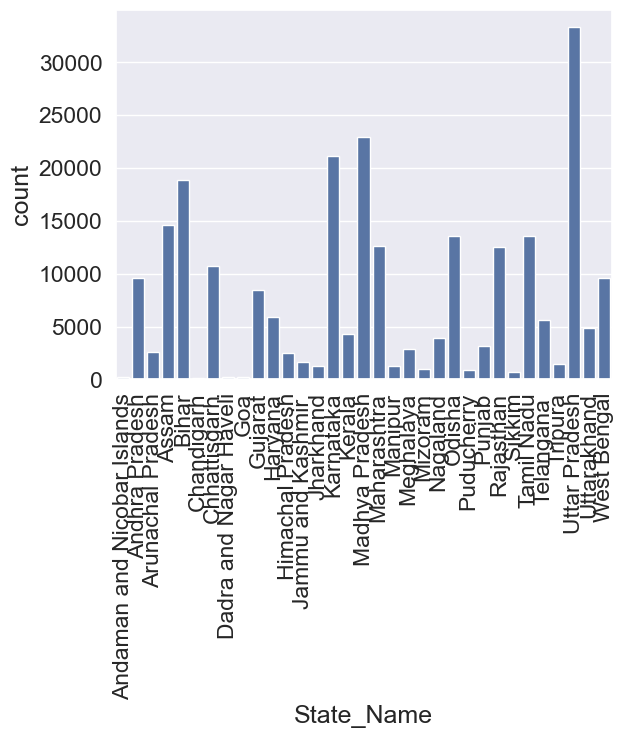

In [148]:
sns.countplot(data = df, x = "State_Name")

plt.xticks(rotation = 90)
plt.show()

In [107]:
df.Crop_Year.value_counts()[:10]

Crop_Year
2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
Name: count, dtype: int64

<Axes: xlabel='Crop'>

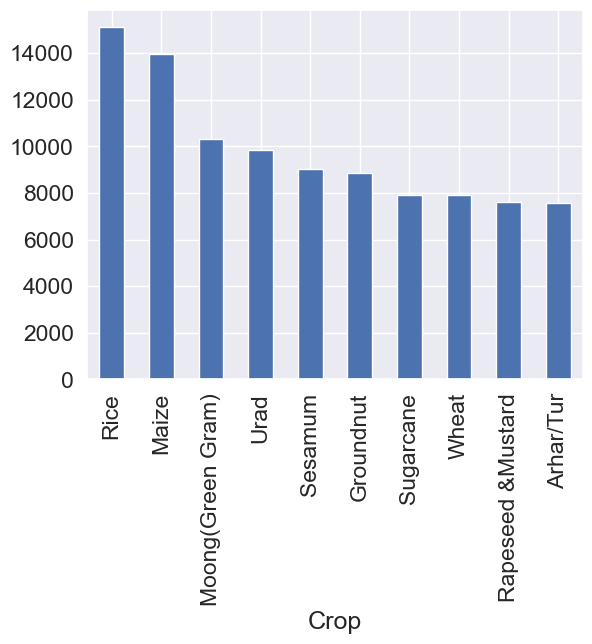

In [131]:
df.Crop.value_counts()[:10].plot(kind="bar")

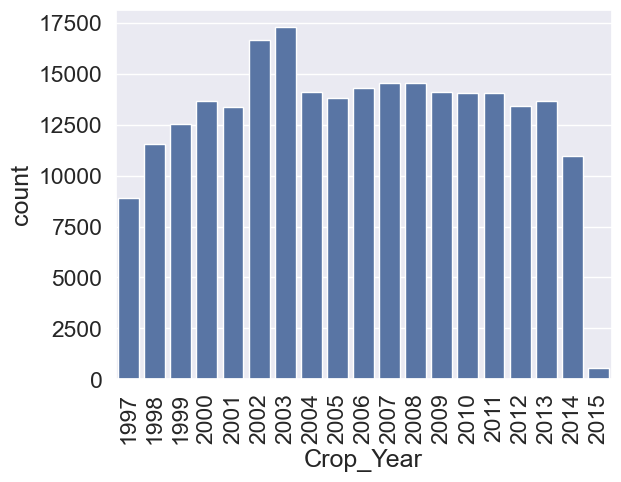

In [132]:
sns.countplot(data = df, x = "Crop_Year")

plt.xticks(rotation = 90)
plt.show()

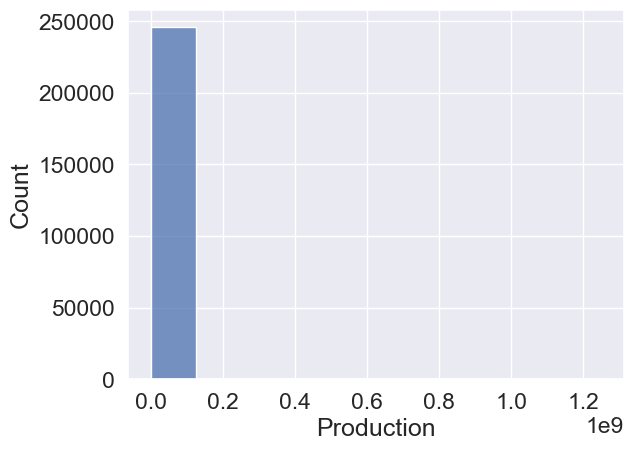

In [133]:
sns.histplot(data = df, x = "Production", bins = 10)
plt.show()

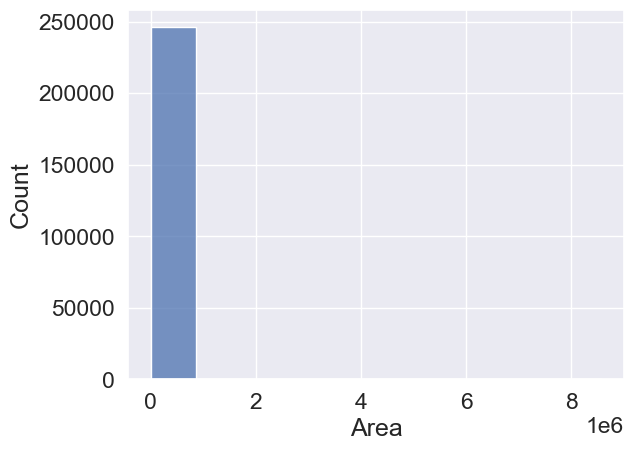

In [134]:

sns.histplot(data = df, x = "Area", bins = 10)
plt.show()

<Axes: xlabel='Production'>

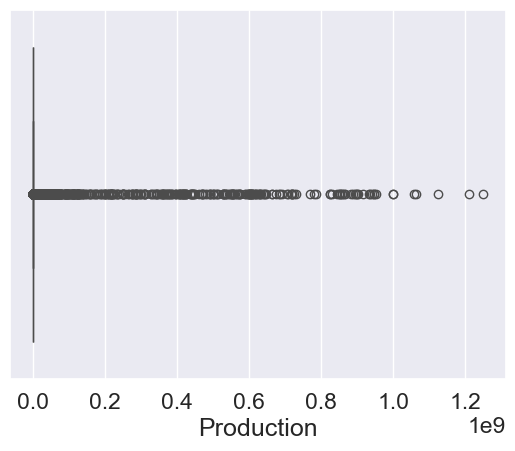

In [135]:
sns.boxplot(data = df, x = "Production")

<Axes: xlabel='Area'>

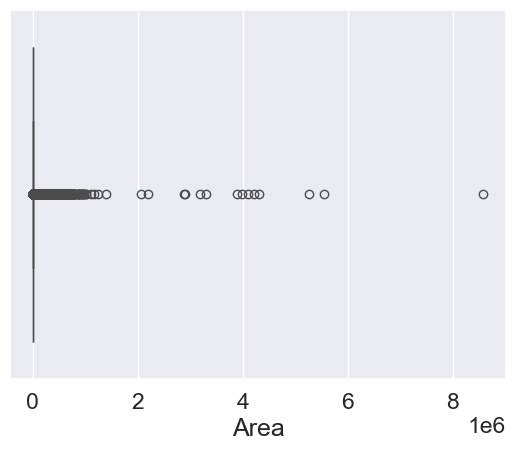

In [136]:
sns.boxplot(data = df, x = "Area")

<Axes: xlabel='State_Name'>

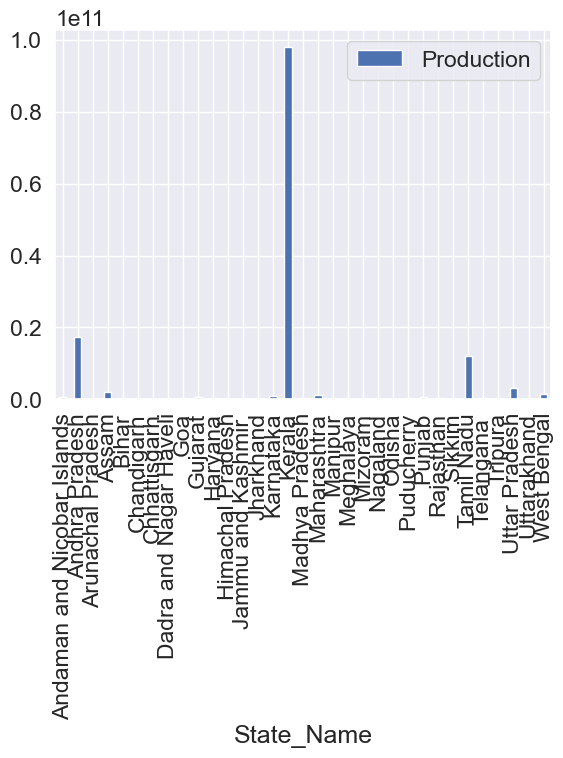

In [139]:
# Surprising that Kerala state has highest crop production.
df.groupby(["State_Name"]).agg({"Production" : "sum"}).plot(kind = "bar")

<Figure size 2000x500 with 0 Axes>

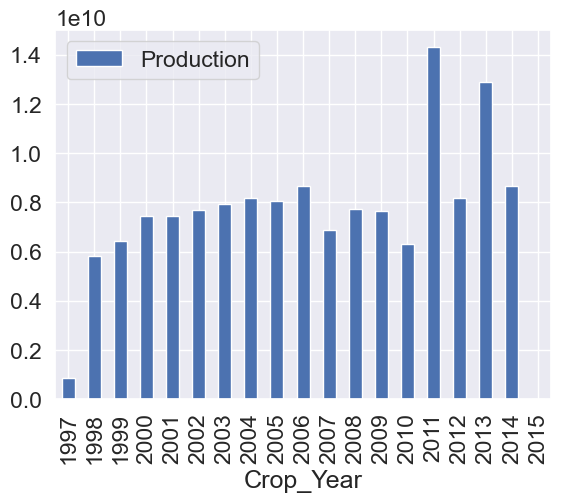

In [149]:
plt.figure(figsize=(20, 5))
df.groupby(["Crop_Year"]).agg({"Production":"sum"}).plot(kind="bar")
plt.show()

<Axes: xlabel='Season'>

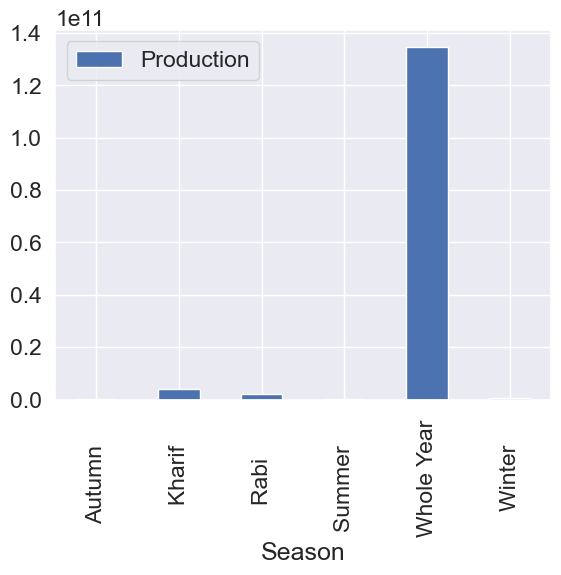

In [150]:
df.groupby(["Season"]).agg({"Production":"sum"}).plot(kind="bar")

PRODUCTION  OF THE MAJOR CROPS RICE AND WHEAT IN LAST 22 YEARS

In [151]:
df.groupby('Crop')['Production'].sum().reset_index().sort_values(
    by='Production', ascending=False)

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
...,...,...
71,Other Citrus Fruit,0.000000e+00
35,Cucumber,0.000000e+00
58,Litchi,0.000000e+00
54,Lab-Lab,0.000000e+00


C:\Users\HP\AppData\Local\Temp\ipykernel_6272\3093028488.py:7: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(x=DF['Crop_Year'], y=DF['Production'], errwidth=2)


,Crop_Year,Production
14,2011,1.430890e+10
16,2013,1.290359e+10
9,2006,8.681913e+09
17,2014,8.664541e+09
7,2004,8.189462e+09
15,2012,8.171055e+09
8,2005,8.043757e+09
6,2003,7.917974e+09
11,2008,7.717018e+09
5,2002,7.696955e+09


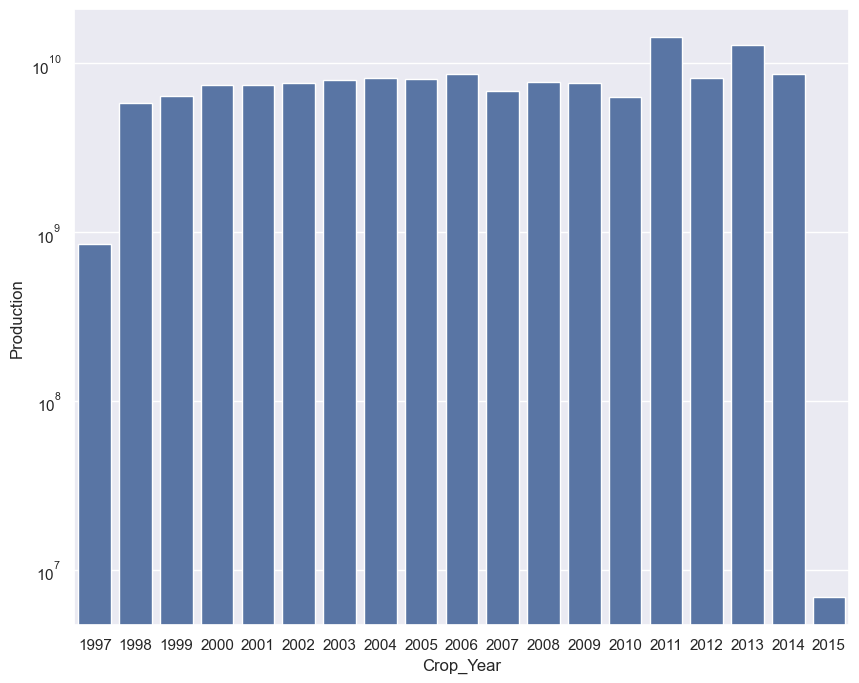

In [153]:
DF = df.copy()
DF = DF.groupby(
    by='Crop_Year')['Production'].sum().reset_index().sort_values(
        by='Production', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=DF['Crop_Year'], y=DF['Production'], errwidth=2)
sns.set(font_scale=1)
plt.yscale('log')
DF

PRODUCTION OF WHEAT

In [155]:
rice = df[df['Crop'] == 'Wheat']
rice

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0
...,...,...,...,...,...,...,...
245949,West Bengal,PURULIA,2010,Rabi,Wheat,2013.0,5152.0
245980,West Bengal,PURULIA,2011,Rabi,Wheat,1880.0,4206.0
246012,West Bengal,PURULIA,2012,Rabi,Wheat,1648.0,3310.0
246047,West Bengal,PURULIA,2013,Rabi,Wheat,1187.0,2675.0


STATE AND UT VS PRODUCTION OF RICE

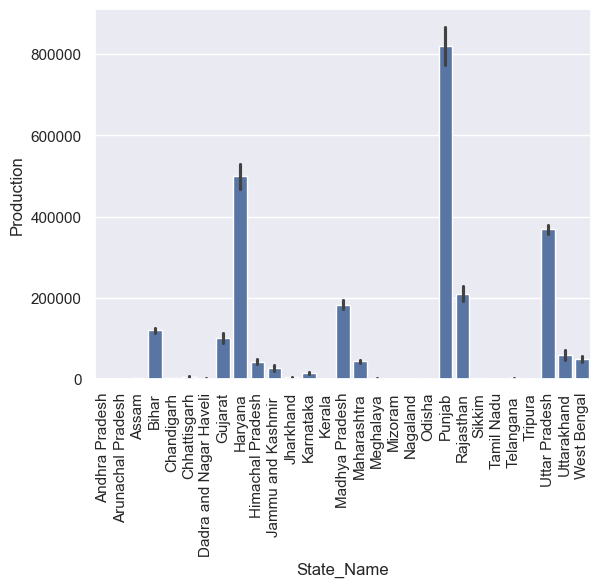

In [156]:
sns.barplot(x='State_Name', y='Production', data=rice)
plt.xticks(rotation=90)
plt.show()

TOP 5 DISTRICTS WITH HIGHEST YIELD OF RICE

C:\Users\HP\AppData\Local\Temp\ipykernel_6272\4089779059.py:7: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(x=DF['District_Name'].head(),


,District_Name,Production
174,FIROZEPUR,28037000.0
454,SANGRUR,27948000.0
320,LUDHIANA,22779000.0
399,PATIALA,21325000.0
20,AMRITSAR,20989000.0


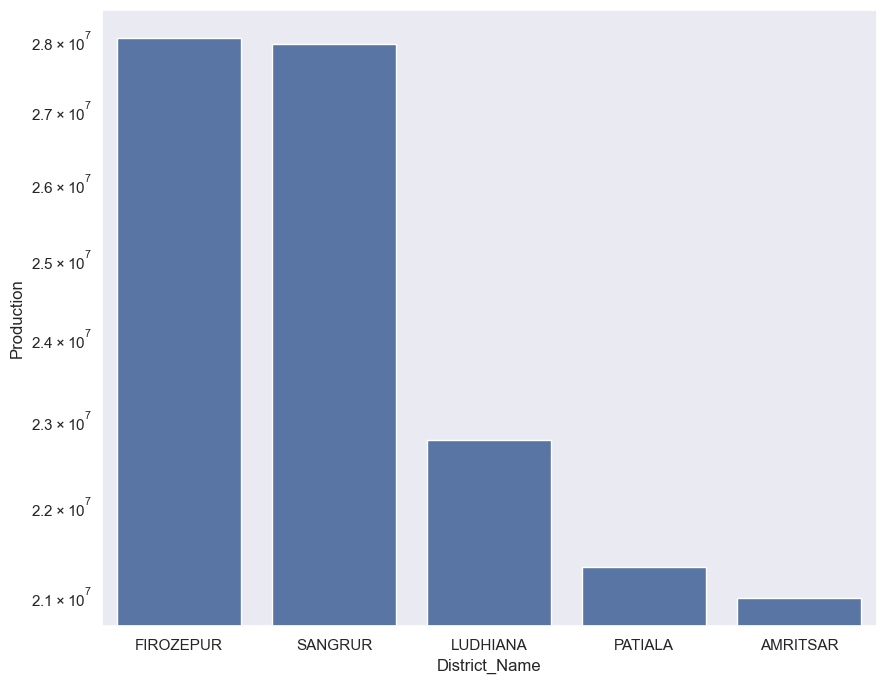

In [157]:
DF = rice.copy()
DF = DF.groupby(
    by='District_Name')['Production'].sum().reset_index().sort_values(
        by='Production', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=DF['District_Name'].head(),
            y=DF['Production'].head(),
            errwidth=2)
sns.set(font_scale=1)
plt.yscale('log')
DF.head()

YEAR WISE PRODUCTION OF RICE

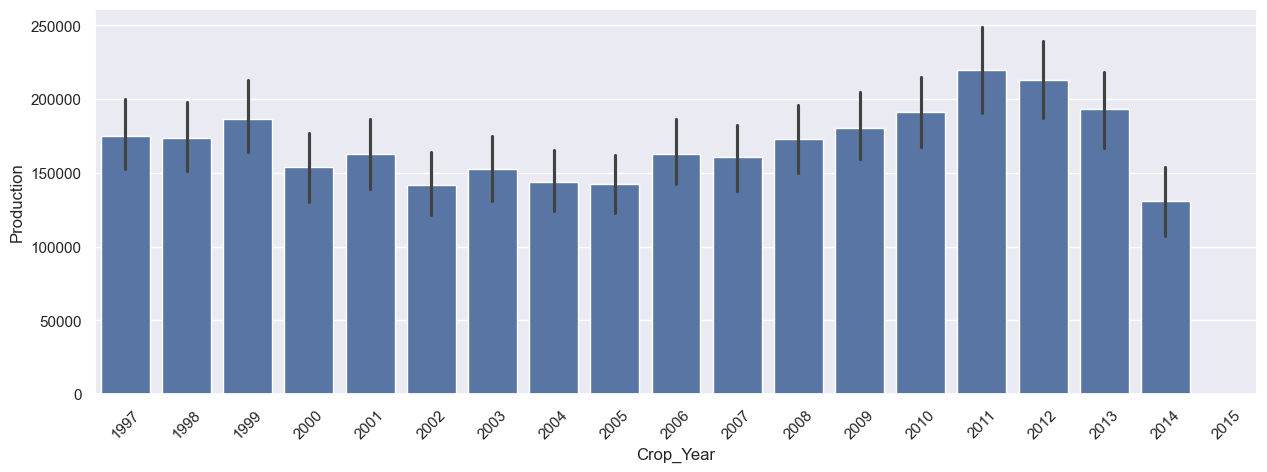

In [159]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Crop_Year', y='Production', data=rice)
plt.xticks(rotation=45)
plt.show()

AREA WISE PRODUCTION OF RICE

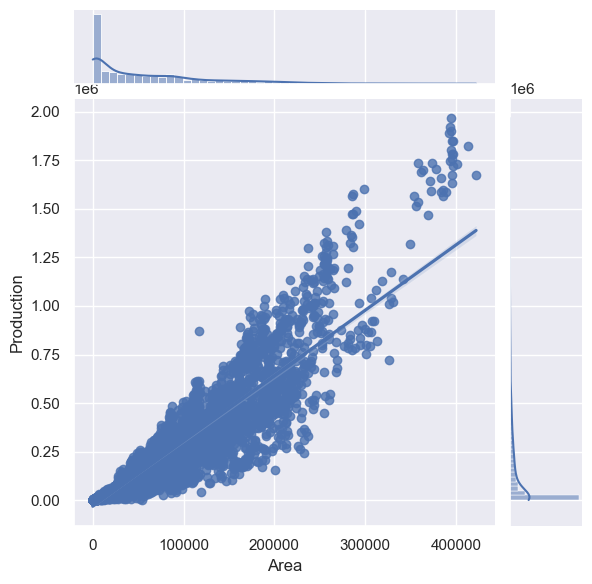

In [160]:
sns.jointplot(x='Area',
              y='Production',
              data=rice,
              kind='reg')


Insights:-
   From Data Visualization
   
  *Rice production is mostly dependent on Area and State/Union Territory/District.

  *Rice is not seasonal according the graphs.

In [161]:
wheat = df[df['Crop'] == 'Wheat']
wheat.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0


STATE AND UT VS PRODUCTION OF WHEAT

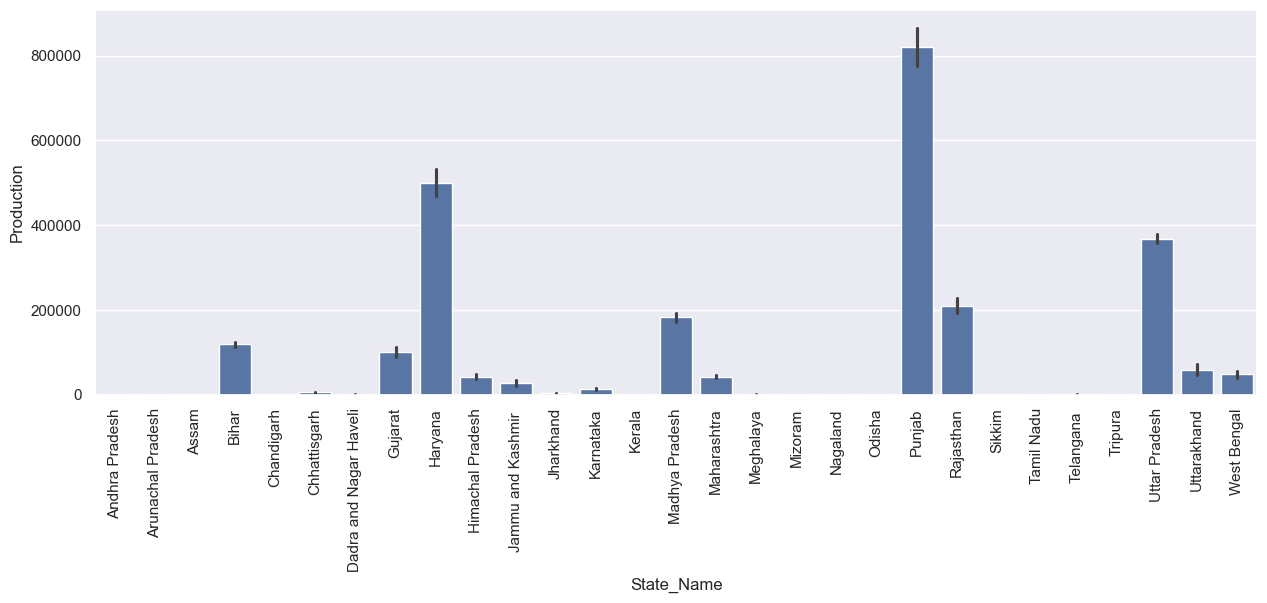

In [162]:
plt.figure(figsize=(15, 5))
sns.barplot(x='State_Name', y='Production', data=wheat)
plt.xticks(rotation=90)
plt.show()

TOP 5 DISTRICT WITH HIGHEST YIELD OF WHEAT

In [163]:
TopWheatPro = wheat.groupby(
    'District_Name')['Production'].sum().reset_index().sort_values(
        by='Production', ascending=False)
summ = TopWheatPro['Production'].sum()
TopWheatPro['Production in %'] = TopWheatPro['Production'].map(
    lambda x: (x / summ) * 100)
TopWheatPro.head()

,District_Name,Production,Production in %
174,FIROZEPUR,28037000.0,2.103576
454,SANGRUR,27948000.0,2.096898
320,LUDHIANA,22779000.0,1.709076
399,PATIALA,21325000.0,1.599984
20,AMRITSAR,20989000.0,1.574775


C:\Users\HP\AppData\Local\Temp\ipykernel_6272\3631515190.py:7: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(x=DF1['District_Name'].head(),


,District_Name,Production
174,FIROZEPUR,28037000.0
454,SANGRUR,27948000.0
320,LUDHIANA,22779000.0
399,PATIALA,21325000.0
20,AMRITSAR,20989000.0


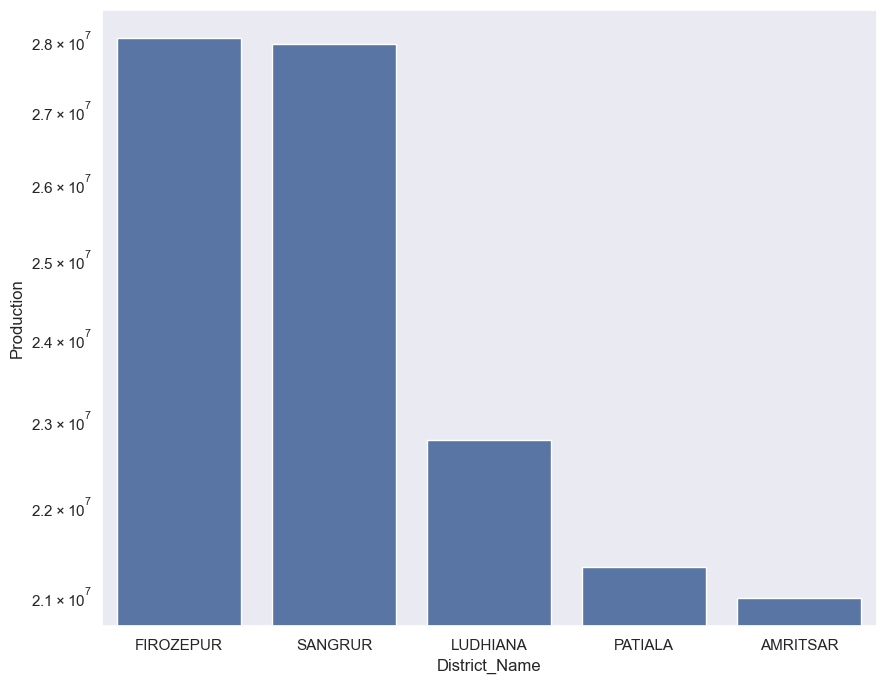

In [165]:
DF1 = wheat.copy()
DF1 = DF1.groupby(
    by='District_Name')['Production'].sum().reset_index().sort_values(
        by='Production', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=DF1['District_Name'].head(),
            y=DF['Production'].head(),
            errwidth=2)
sns.set(font_scale=1)
plt.yscale('log')
DF1.head()

YEAR

In [167]:
df['Crop_Year'].nunique()

19

In [168]:
df['Crop_Year'].value_counts()

Crop_Year
2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: count, dtype: int64

YEAR VS PRODUCTION

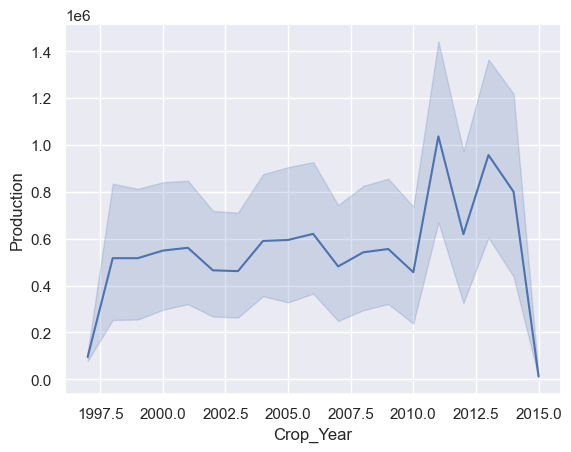

In [169]:
sns.lineplot(x=df['Crop_Year'], y=df['Production'])
plt.show()

SEASON

In [170]:
df['Season'].value_counts()

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64

SEASON BASED PRODUCTION

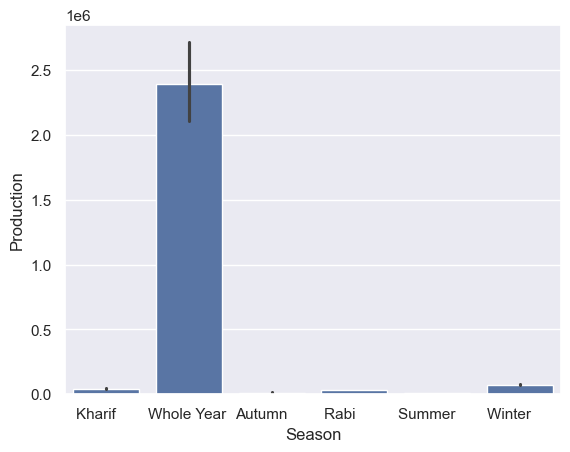

In [171]:
sns.barplot(x=df['Season'], y=df['Production'])
plt.show()

SEASON VS PRODUCTION OF RICE

C:\Users\HP\AppData\Local\Temp\ipykernel_6272\3927396913.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 100)` for the same effect.

  sns.barplot(x='Season', y='Production', data=rice, ci=100)


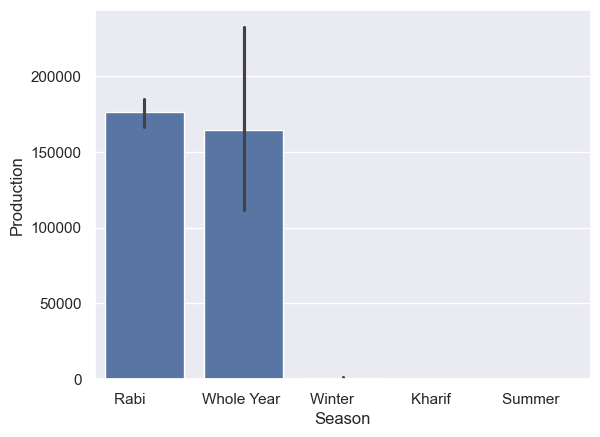

In [172]:
sns.barplot(x='Season', y='Production', data=rice, ci=100)
sns.set(font_scale=1)